# Projek Kelompok Team 8

### Import Packages


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gddrive')

Mounted at /content/gddrive


In [ ]:
# Nanti masukin alamat path gdrivenya disini aja ya guys
path0 = '/content/gddrive/MyDrive/Colab Notebooks/'                  # path-nya mei
path1 = '/content/gddrive/MyDrive/Data Narasio Google Colab/'        # path-nya teku
#path2 =
path3 = '/content/gddrive/MyDrive/Dataset/'                          # path-nya fariz

In [ ]:
# Who are you ?
path = path1

# path0 if u are Meilin
# path1 if u are Teku
# path2 if u are Tatvany
# path3 if u are Fariz

In [ ]:
keterangan = pd.read_csv(path + 'Metadata PT 456.csv')

keterangan

Unnamed: 0                                         Unnamed: 1  \
0            Nama Kolom                                          Deskripsi   
1       Nomor Transaksi                      Nomor transaksi yang di buat    
2      Status Transaksi                    Status transaksi yang di pilih    
3              Order At                       Timestamp masuknya transaksi   
4                  Date                           Tanggal transaksi dibuat   
5           Merchant ID  ID merchant yang dipilih oleh cust pada transaksi   
6            Kategori\r  Katagori merchant yang dipilih oleh cust pada ...   
7      SKU Product Name                                       Nama product   
8        Nomor Customer               ID/nomor cust yang membuat transaksi   
9         Register Date                  Tanggal registrasi akun oleh cust   
10               Amount                                       Harga barang   
11      Selling Price\r                                         Harga jual   
12             Quantity                           Total barang yang dibeli   
13         Total Amount                                 Total harga barang   
14  Total Selling Price                                   Total harga jual   

     Unnamed: 2  
0     Tipe Data  
1       VARCHAR  
2   CATAGORICAL  
3     TIMESTAMP  
4          DATE  
5       VARCHAR  
6   CATAGORICAL  
7          TEXT  
8       VARCHAR  
9          DATE  
10          INT  
11          INT  
12          INT  
13          INT  
14          INT

In [ ]:
df = pd.read_csv(path + 'Data_Transaksi_PT_456.csv', encoding='Windows-1254')
df.head()

Nomor Transaksi Status Transaksi             Order At        Date  \
0     1.640970e+12          Reguler  2022-01-01 00:02:30  2022-01-01   
1     1.640970e+12          Reguler  2022-01-01 00:07:05  2022-01-01   
2     1.640970e+12          Reguler  2022-01-01 00:09:00  2022-01-01   
3     1.640970e+12          Reguler  2022-01-01 00:11:50  2022-01-01   
4     1.640970e+12          Reguler  2022-01-01 00:11:50  2022-01-01   

   Merchant ID           Kategori                           SKU Product Name  \
0        T675a    App & Lifestyle          Voucher Digital T675a Rp. 500.000   
1        T675a    App & Lifestyle          Voucher Digital T675a Rp. 500.000   
2        T675a    App & Lifestyle        Voucher Digital T675a Rp. 1.000.000   
3  T672672672a  Gold & Investment    Voucher Digital T672672672a Rp. 100.000   
4  T672672672a  Gold & Investment  Voucher Digital T672672672a Rp. 1.000.000   

  Nomor Customer Register Date   Amount  Selling Price  Quantity  \
0       rpbvpbvu    2021-10-16   500000         500000         1   
1       rpbvpbvu    2021-10-16   500000         500000         1   
2       ipbvpbve    2021-08-02  1000000        1000000         1   
3       rpbvpbvn    2020-09-11   100000          99000         1   
4       rpbvpbvn    2020-09-11  1000000         990000         2   

   Total Amount  Total Selling Price  
0        500000               500000  
1        500000               500000  
2       1000000              1000000  
3        100000                99000  
4       2000000              1980000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654523 entries, 0 to 654522
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Nomor Transaksi      654523 non-null  float64
 1   Status Transaksi     654523 non-null  object 
 2   Order At             654523 non-null  object 
 3   Date                 654523 non-null  object 
 4   Merchant ID          654523 non-null  object 
 5   Kategori             654523 non-null  object 
 6   SKU Product Name     654523 non-null  object 
 7   Nomor Customer       654523 non-null  object 
 8   Register Date        654409 non-null  object 
 9   Amount               654523 non-null  int64  
 10  Selling Price        654523 non-null  int64  
 11  Quantity             654523 non-null  int64  
 12  Total Amount         654523 non-null  int64  
 13  Total Selling Price  654523 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 69.9+ MB


In [ ]:
# Mengatur format float agar tidak menggunakan notasi ilmiah
pd.options.display.float_format = '{:,.0f}'.format

df.head()


Nomor Transaksi Status Transaksi             Order At        Date  \
0 1,640,970,000,000          Reguler  2022-01-01 00:02:30  2022-01-01   
1 1,640,970,000,000          Reguler  2022-01-01 00:07:05  2022-01-01   
2 1,640,970,000,000          Reguler  2022-01-01 00:09:00  2022-01-01   
3 1,640,970,000,000          Reguler  2022-01-01 00:11:50  2022-01-01   
4 1,640,970,000,000          Reguler  2022-01-01 00:11:50  2022-01-01   

   Merchant ID           Kategori                           SKU Product Name  \
0        T675a    App & Lifestyle          Voucher Digital T675a Rp. 500.000   
1        T675a    App & Lifestyle          Voucher Digital T675a Rp. 500.000   
2        T675a    App & Lifestyle        Voucher Digital T675a Rp. 1.000.000   
3  T672672672a  Gold & Investment    Voucher Digital T672672672a Rp. 100.000   
4  T672672672a  Gold & Investment  Voucher Digital T672672672a Rp. 1.000.000   

  Nomor Customer Register Date   Amount  Selling Price  Quantity  \
0       rpbvpbvu    2021-10-16   500000         500000         1   
1       rpbvpbvu    2021-10-16   500000         500000         1   
2       ipbvpbve    2021-08-02  1000000        1000000         1   
3       rpbvpbvn    2020-09-11   100000          99000         1   
4       rpbvpbvn    2020-09-11  1000000         990000         2   

   Total Amount  Total Selling Price  
0        500000               500000  
1        500000               500000  
2       1000000              1000000  
3        100000                99000  
4       2000000              1980000

In [ ]:
df.describe()

Nomor Transaksi        Amount  Selling Price       Quantity  \
count     6.545230e+05  6.545230e+05   6.545230e+05  654523.000000   
mean      1.656813e+12  2.175059e+05   1.998825e+05       2.694240   
std       9.306590e+09  4.821338e+05   4.630060e+05      11.526596   
min       1.640970e+12  5.000000e+03   2.500000e+02       1.000000   
25%       1.648640e+12  5.000000e+04   2.700000e+04       1.000000   
50%       1.657160e+12  1.000000e+05   8.700000e+04       1.000000   
75%       1.664890e+12  2.500000e+05   2.250000e+05       2.000000   
max       1.672510e+12  1.000000e+07   1.000000e+07    2100.000000   

       Total Amount  Total Selling Price  
count  6.545230e+05         6.545230e+05  
mean   6.450017e+05         6.041757e+05  
std    2.812942e+06         2.721511e+06  
min    5.000000e+03         0.000000e+00  
25%    5.000000e+04         3.000000e+04  
50%    1.000000e+05         9.300000e+04  
75%    4.000000e+05         3.860000e+05  
max    2.100000e+08         2.026500e+08

### Problem Statement

PT 456 adalah platform yang menyediakan penjualan voucher digital dan
gift card dalam satu platform. Saat ini PT 456 mulai beralih ke bisnis digital.
PT 456 menyediakan voucher, gift card, reward untuk memberikan
kemudahan kepada pelanggan dalam berbelanja.


“Melakukan analisis untuk mendapatkan insight terkait dengan
segmentasi customer yang melakukan transaksi di aplikasi
yang dikembangkan oleh PT 456”

Pada akhirnya, proyek ini diharapkan dapat membantu
platform PT 456 untuk mengembangkan strategi penjualan
dan produk.

Data yang digunakan adalah dataset sales perusahaan. Anda diminta
untuk menganalisa:


Melakukan segmentasi produk berbasis clustering seperti tipe voucher,
kategori, merchant, dan lain sebagainya yang memiliki karakteristik yang
sama untuk menemukan voucher sukses

Tujuan dari analisis ini:

a. Dapat memberikan rekomendasi yang actionable untuk
meningkatkan penjualan perusahaan berdasarkan profiling yang
berdasarkan kepada customer segmentasi.

b. Dapat memberikan metrik analitik tambahan yang sesuai dengan
scope ini

###Cleaning

####Missing Value

In [ ]:
#mengecek jumlah missing masing-masing kolom
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

Nomor Transaksi          0
Status Transaksi         0
Order At                 0
Date                     0
Merchant ID              0
Kategori                 0
SKU Product Name         0
Nomor Customer           0
Register Date          114
Amount                   0
Selling Price            0
Quantity                 0
Total Amount             0
Total Selling Price      0
dtype: int64

In [ ]:
#menghitung rasio missing value
rasio = jumlah_missing.div(len(df))
rasio

Nomor Transaksi       0
Status Transaksi      0
Order At              0
Date                  0
Merchant ID           0
Kategori              0
SKU Product Name      0
Nomor Customer        0
Register Date         0
Amount                0
Selling Price         0
Quantity              0
Total Amount          0
Total Selling Price   0
dtype: float64

In [ ]:
#Permasalahan missing value pada kolom Register Date dapat diatasi dengan modus
df['Register Date'].fillna(df['Register Date'].mode()[0], inplace = True)             # teku : kalo ini diapus aja gmn soalnya datanya dikit?

In [ ]:
#mengecek kembali apakah terdapat missing value
pd.isnull(df).sum()

Nomor Transaksi        0
Status Transaksi       0
Order At               0
Date                   0
Merchant ID            0
Kategori               0
SKU Product Name       0
Nomor Customer         0
Register Date          0
Amount                 0
Selling Price          0
Quantity               0
Total Amount           0
Total Selling Price    0
dtype: int64

####Duplicated Data

    ❌ teku : teku punya saran kalo duplikatnya berdasarkan order date gimana?

In [ ]:
#mengidentifikasi apakah terdapat duplicate value pada data dengan acuan Nomor Transaksi dan Merchant ID
df[df[["Order At", "SKU Product Name",'Nomor Customer']].duplicated(keep=False)].sort_values("Order At")

Nomor Transaksi Status Transaksi             Order At        Date  \
4476   1,641,190,000,000            Promo  2022-01-03 13:04:50  2022-01-03   
4480   1,641,190,000,000            Promo  2022-01-03 13:04:50  2022-01-03   
4520   1,641,190,000,000            Promo  2022-01-03 13:08:56  2022-01-03   
4521   1,641,190,000,000            Promo  2022-01-03 13:08:56  2022-01-03   
4557   1,641,190,000,000            Promo  2022-01-03 13:10:15  2022-01-03   
...                  ...              ...                  ...         ...   
645720 1,672,140,000,000            Promo  2022-12-27 17:55:36  2022-12-27   
646161 1,672,150,000,000            Promo  2022-12-27 20:20:43  2022-12-27   
646162 1,672,150,000,000            Promo  2022-12-27 20:20:43  2022-12-27   
647960 1,672,230,000,000          Reguler  2022-12-28 20:22:08  2022-12-28   
647961 1,672,230,000,000          Reguler  2022-12-28 20:22:08  2022-12-28   

           Merchant ID                  Kategori  \
4476          G672672e           App & Lifestyle   
4480          G672672e           App & Lifestyle   
4520    A672672672672t       Retail & Dept Store   
4521    A672672672672t       Retail & Dept Store   
4557             M672x  Activity & Entertainment   
...                ...                       ...   
645720        G672672d           App & Lifestyle   
646161        G672672d           App & Lifestyle   
646162        G672672d           App & Lifestyle   
647960        B675675p           Food & Beverage   
647961        B675675p           Food & Beverage   

                                         SKU Product Name Nomor Customer  \
4476          Voucher Digital G672672e Rp. 15.000 - Promo       ypbvpbv2   
4480          Voucher Digital G672672e Rp. 15.000 - Promo       ypbvpbv2   
4520    Voucher Digital A672672672672t Rp. 25.000 - Promo       mpbvpbva   
4521    Voucher Digital A672672672672t Rp. 25.000 - Promo       mpbvpbva   
4557             Voucher Digital M672x Rp. 25.000 - Promo       mpbvpbva   
...                                                   ...            ...   
645720        Voucher Digital G672672d Rp. 50.000 - Promo       wpbvpbv0   
646161        Voucher Digital G672672d Rp. 50.000 - Promo       fpbvpbvh   
646162        Voucher Digital G672672d Rp. 50.000 - Promo       fpbvpbvh   
647960               Voucher Digital B675675p Rp. 200.000       tpbvpbvd   
647961               Voucher Digital B675675p Rp. 200.000       tpbvpbvd   

       Register Date  Amount  Selling Price  Quantity  Total Amount  \
4476      2020-10-28   15000          10000         1         15000   
4480      2020-10-28   15000          15000         1         15000   
4520      2021-10-26   25000          19000         1         25000   
4521      2020-10-24   25000          19000         1         25000   
4557      2021-10-26   25000          19000         1         25000   
...              ...     ...            ...       ...           ...   
645720    2020-09-26   50000          25000         1         50000   
646161    2021-12-09   50000          25000         1         50000   
646162    2021-12-09   50000          25000         1         50000   
647960    2021-05-06  200000         180000         1        200000   
647961    2021-05-06  200000         180000         1        200000   

        Total Selling Price  
4476                  10000  
4480                  15000  
4520                  19000  
4521                  19000  
4557                  19000  
...                     ...  
645720                25000  
646161                25000  
646162                25000  
647960               180000  
647961               180000  

[346 rows x 14 columns]

    ❗Ini versi teuku, gimana menurut kalian guys?
    WELP HAVE TO NOTES YA kalo bisa aja dia check out di waktu bersamaan ya, but 346 data i think not too much lah ya?

In [ ]:
#menghapus duplicate value pada tabel
df = df.drop_duplicates(subset=["Order At", "SKU Product Name",'Nomor Customer']).reset_index()

In [ ]:
#cek kembali apakah masih terdapat data yang duplicate
df[df[["Order At", "SKU Product Name",'Nomor Customer']].duplicated(keep=False)].sort_values("Order At")

Empty DataFrame
Columns: [index, Nomor Transaksi, Status Transaksi, Order At, Date, Merchant ID, Kategori, SKU Product Name, Nomor Customer, Register Date, Amount, Selling Price, Quantity, Total Amount, Total Selling Price]
Index: []

#### Membuat Kolom baru berisi Klasifikasi Harga voucher

In [ ]:
def cat(x) :
    if (x >= 5000 and x < 10000):                          # sangat murah
        return "Sangat Kecil"
    elif (x >= 10000 and x < 25000):                       # murah
        return "Kecil"
    elif (x >= 25000 and x < 100000):                      # Menengah
        return "Menengah"
    elif (x >= 100000 and x < 500000):                    # Mahal
        return  "Besar"
    elif (x >= 500000):                                  # Sangat mahal
        return 'Sangat Besar'


In [ ]:
df['Kelas Voucher'] =  df['Amount'].apply(lambda x : cat(x))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654350 entries, 0 to 654349
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   index                654350 non-null  int64         
 1   Nomor Transaksi      654350 non-null  float64       
 2   Status Transaksi     654350 non-null  object        
 3   Order At             654350 non-null  object        
 4   Date                 654350 non-null  datetime64[ns]
 5   Merchant ID          654350 non-null  object        
 6   Kategori             654350 non-null  object        
 7   SKU Product Name     654350 non-null  object        
 8   Nomor Customer       654350 non-null  object        
 9   Register Date        654350 non-null  object        
 10  Amount               654350 non-null  int64         
 11  Selling Price        654350 non-null  int64         
 12  Quantity             654350 non-null  int64         
 13  Total Amount  

In [ ]:
df

index   Nomor Transaksi Status Transaksi             Order At  \
0            0 1,640,970,000,000          Reguler  2022-01-01 00:02:30   
1            1 1,640,970,000,000          Reguler  2022-01-01 00:07:05   
2            2 1,640,970,000,000          Reguler  2022-01-01 00:09:00   
3            3 1,640,970,000,000          Reguler  2022-01-01 00:11:50   
4            4 1,640,970,000,000          Reguler  2022-01-01 00:11:50   
...        ...               ...              ...                  ...   
654345  654518 1,672,510,000,000            Promo  2022-12-31 23:52:14   
654346  654519 1,672,510,000,000            Promo  2022-12-31 23:52:14   
654347  654520 1,672,510,000,000          Reguler  2022-12-31 23:54:06   
654348  654521 1,672,510,000,000          Reguler  2022-12-31 23:54:24   
654349  654522 1,672,510,000,000          Reguler  2022-12-31 23:57:57   

             Date        Merchant ID                  Kategori  \
0      2022-01-01              T675a           App & Lifestyle   
1      2022-01-01              T675a           App & Lifestyle   
2      2022-01-01              T675a           App & Lifestyle   
3      2022-01-01        T672672672a         Gold & Investment   
4      2022-01-01        T672672672a         Gold & Investment   
...           ...                ...                       ...   
654345 2022-12-31  A675675675675675s           Food & Beverage   
654346 2022-12-31  I675675675675675.           Food & Beverage   
654347 2022-12-31  U675675675675675r           App & Lifestyle   
654348 2022-12-31        C675675675s  Activity & Entertainment   
654349 2022-12-31  U675675675675675r           App & Lifestyle   

                                         SKU Product Name Nomor Customer  \
0                       Voucher Digital T675a Rp. 500.000       rpbvpbvu   
1                       Voucher Digital T675a Rp. 500.000       rpbvpbvu   
2                     Voucher Digital T675a Rp. 1.000.000       ipbvpbve   
3                 Voucher Digital T672672672a Rp. 100.000       rpbvpbvn   
4               Voucher Digital T672672672a Rp. 1.000.000       rpbvpbvn   
...                                                   ...            ...   
654345  Voucher Digital A675675675675675s Rp. 50.000 -...       ipbvpbv1   
654346  Voucher Digital I675675675675675. Rp. 50.000 -...       ipbvpbv1   
654347        Voucher Digital U675675675675675r Rp. 5.000       apbvpbve   
654348             Voucher Digital C675675675s Rp 200.000       dpbvpbv.   
654349      Voucher Digital U675675675675675r Rp. 100.000       apbvpbv7   

       Register Date   Amount  Selling Price  Quantity  Total Amount  \
0         2021-10-16   500000         500000         1        500000   
1         2021-10-16   500000         500000         1        500000   
2         2021-08-02  1000000        1000000         1       1000000   
3         2020-09-11   100000          99000         1        100000   
4         2020-09-11  1000000         990000         2       2000000   
...              ...      ...            ...       ...           ...   
654345    2020-10-28    50000          30000         1         50000   
654346    2020-10-28    50000          33000         1         50000   
654347    2022-07-30     5000           5000         1          5000   
654348    2019-08-30   200000         170000         1        200000   
654349    2022-12-31   100000         100000         2        200000   

        Total Selling Price Kelas Voucher  
0                    500000  Sangat Besar  
1                    500000  Sangat Besar  
2                   1000000  Sangat Besar  
3                     99000         Besar  
4                   1980000  Sangat Besar  
...                     ...           ...  
654345                30000      Menengah  
654346                33000      Menengah  
654347                 5000  Sangat Kecil  
654348               170000         Besar  
654349               200000         Besar  

[654350 rows x 16 co

#### Meringkas jenis kategori di kolom 'Kategori'

In [ ]:
#df['Kategori'] = df['Kategori'].replace(['1st old value', '2nd old value', ...], 'new value')

df['Kategori'] = df['Kategori'].replace(['Lain - lain'], 'Lain - Lain')

df['Kategori'] = df['Kategori'].replace(['Department Store'], 'Retail & Dept Store')

df['Kategori'] = df['Kategori'].replace(['UMKM', '[New] Singapore', 'E-Commerce', 'Healthcare'], 'Lain - Lain')


####Removing

In [ ]:
df_fill = df[['Status Transaksi', 'Kategori', 'Amount', 'Selling Price', 'Quantity', 'Total Amount', 'Total Selling Price']]
df_fill.head()

Status Transaksi           Kategori   Amount  Selling Price  Quantity  \
0          Reguler    App & Lifestyle   500000         500000         1   
1          Reguler    App & Lifestyle   500000         500000         1   
2          Reguler    App & Lifestyle  1000000        1000000         1   
3          Reguler  Gold & Investment   100000          99000         1   
4          Reguler  Gold & Investment  1000000         990000         2   

   Total Amount  Total Selling Price  
0        500000               500000  
1        500000               500000  
2       1000000              1000000  
3        100000                99000  
4       2000000              1980000

In [ ]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654350 entries, 0 to 654349
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Status Transaksi     654350 non-null  object
 1   Kategori             654350 non-null  object
 2   Amount               654350 non-null  int64 
 3   Selling Price        654350 non-null  int64 
 4   Quantity             654350 non-null  int64 
 5   Total Amount         654350 non-null  int64 
 6   Total Selling Price  654350 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 34.9+ MB


### EDA

- Vany
- Teku

In [ ]:
df

index   Nomor Transaksi Status Transaksi             Order At  \
0            0 1,640,970,000,000          Reguler  2022-01-01 00:02:30   
1            1 1,640,970,000,000          Reguler  2022-01-01 00:07:05   
2            2 1,640,970,000,000          Reguler  2022-01-01 00:09:00   
3            3 1,640,970,000,000          Reguler  2022-01-01 00:11:50   
4            4 1,640,970,000,000          Reguler  2022-01-01 00:11:50   
...        ...               ...              ...                  ...   
654345  654518 1,672,510,000,000            Promo  2022-12-31 23:52:14   
654346  654519 1,672,510,000,000            Promo  2022-12-31 23:52:14   
654347  654520 1,672,510,000,000          Reguler  2022-12-31 23:54:06   
654348  654521 1,672,510,000,000          Reguler  2022-12-31 23:54:24   
654349  654522 1,672,510,000,000          Reguler  2022-12-31 23:57:57   

             Date        Merchant ID                  Kategori  \
0      2022-01-01              T675a           App & Lifestyle   
1      2022-01-01              T675a           App & Lifestyle   
2      2022-01-01              T675a           App & Lifestyle   
3      2022-01-01        T672672672a         Gold & Investment   
4      2022-01-01        T672672672a         Gold & Investment   
...           ...                ...                       ...   
654345 2022-12-31  A675675675675675s           Food & Beverage   
654346 2022-12-31  I675675675675675.           Food & Beverage   
654347 2022-12-31  U675675675675675r           App & Lifestyle   
654348 2022-12-31        C675675675s  Activity & Entertainment   
654349 2022-12-31  U675675675675675r           App & Lifestyle   

                                         SKU Product Name Nomor Customer  \
0                       Voucher Digital T675a Rp. 500.000       rpbvpbvu   
1                       Voucher Digital T675a Rp. 500.000       rpbvpbvu   
2                     Voucher Digital T675a Rp. 1.000.000       ipbvpbve   
3                 Voucher Digital T672672672a Rp. 100.000       rpbvpbvn   
4               Voucher Digital T672672672a Rp. 1.000.000       rpbvpbvn   
...                                                   ...            ...   
654345  Voucher Digital A675675675675675s Rp. 50.000 -...       ipbvpbv1   
654346  Voucher Digital I675675675675675. Rp. 50.000 -...       ipbvpbv1   
654347        Voucher Digital U675675675675675r Rp. 5.000       apbvpbve   
654348             Voucher Digital C675675675s Rp 200.000       dpbvpbv.   
654349      Voucher Digital U675675675675675r Rp. 100.000       apbvpbv7   

       Register Date   Amount  Selling Price  Quantity  Total Amount  \
0         2021-10-16   500000         500000         1        500000   
1         2021-10-16   500000         500000         1        500000   
2         2021-08-02  1000000        1000000         1       1000000   
3         2020-09-11   100000          99000         1        100000   
4         2020-09-11  1000000         990000         2       2000000   
...              ...      ...            ...       ...           ...   
654345    2020-10-28    50000          30000         1         50000   
654346    2020-10-28    50000          33000         1         50000   
654347    2022-07-30     5000           5000         1          5000   
654348    2019-08-30   200000         170000         1        200000   
654349    2022-12-31   100000         100000         2        200000   

        Total Selling Price Kelas Voucher  
0                    500000  Sangat Besar  
1                    500000  Sangat Besar  
2                   1000000  Sangat Besar  
3                     99000         Besar  
4                   1980000  Sangat Besar  
...                     ...           ...  
654345                30000      Menengah  
654346                33000      Menengah  
654347                 5000  Sangat Kecil  
654348               170000         Besar  
654349               200000         Besar  

[654350 rows x 16 co

In [ ]:
#make columns to lower case
#df.columns = [x.lower() for x in df.columns]

#check unique value for identify inconsisten data
#for x in df.columns:
    #print(f"========== Unique Value for {x}==========")
    #print(f"{df[x].unique()} \n")

In [ ]:
# Identifikasi Total Selling Price per bulan
import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
df.head()

index   Nomor Transaksi Status Transaksi             Order At       Date  \
0      0 1,640,970,000,000          Reguler  2022-01-01 00:02:30 2022-01-01   
1      1 1,640,970,000,000          Reguler  2022-01-01 00:07:05 2022-01-01   
2      2 1,640,970,000,000          Reguler  2022-01-01 00:09:00 2022-01-01   
3      3 1,640,970,000,000          Reguler  2022-01-01 00:11:50 2022-01-01   
4      4 1,640,970,000,000          Reguler  2022-01-01 00:11:50 2022-01-01   

   Merchant ID           Kategori                           SKU Product Name  \
0        T675a    App & Lifestyle          Voucher Digital T675a Rp. 500.000   
1        T675a    App & Lifestyle          Voucher Digital T675a Rp. 500.000   
2        T675a    App & Lifestyle        Voucher Digital T675a Rp. 1.000.000   
3  T672672672a  Gold & Investment    Voucher Digital T672672672a Rp. 100.000   
4  T672672672a  Gold & Investment  Voucher Digital T672672672a Rp. 1.000.000   

  Nomor Customer Register Date   Amount  Selling Price  Quantity  \
0       rpbvpbvu    2021-10-16   500000         500000         1   
1       rpbvpbvu    2021-10-16   500000         500000         1   
2       ipbvpbve    2021-08-02  1000000        1000000         1   
3       rpbvpbvn    2020-09-11   100000          99000         1   
4       rpbvpbvn    2020-09-11  1000000         990000         2   

   Total Amount  Total Selling Price Kelas Voucher  
0        500000               500000  Sangat Besar  
1        500000               500000  Sangat Besar  
2       1000000              1000000  Sangat Besar  
3        100000                99000         Besar  
4       2000000              1980000  Sangat Besar

  bikin kolom baru tentang kategoriin voucgher berdasarkkan harga

In [ ]:
Total_Selling_Permonth= df.groupby(df['Date'].dt.strftime('%B'))['Total Selling Price'].sum().sort_values()

TSM = pd.DataFrame(Total_Selling_Permonth)
TSM1 = TSM.reset_index()
TSM1

Date  Total Selling Price
0       March          23350013771
1    February          24266609881
2         May          25801448982
3      August          27055287714
4       April          27099820623
5    November          28787393568
6     October          29607368057
7        June          31234391288
8     January          37192646560
9        July          39934115056
10  September          49687699925
11   December          51203616881

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'March'),
  Text(1, 0, 'February'),
  Text(2, 0, 'May'),
  Text(3, 0, 'August'),
  Text(4, 0, 'April'),
  Text(5, 0, 'November'),
  Text(6, 0, 'October'),
  Text(7, 0, 'June'),
  Text(8, 0, 'January'),
  Text(9, 0, 'July'),
  Text(10, 0, 'September'),
  Text(11, 0, 'December')])

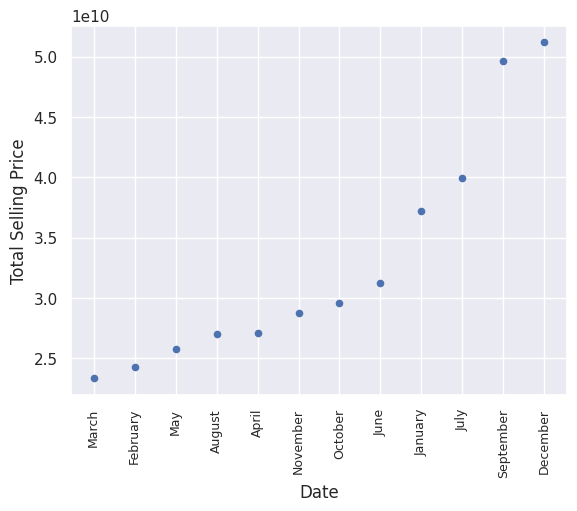

In [ ]:
# Create scatter plot according per month
plot = TSM1.plot.scatter(x='Date', y= 'Total Selling Price')
plt.xticks(fontsize=9, rotation=90)

Berdasarkan jumlah Total Selling Price, bulan yang paling banyak menghasilkana ada pada bulan september dan desember. Pada bulan desember merupakan bulan liburan akhir tahun dan natal yangmana memiliki kemungkinan besar orang-orang tertarik dalam membeli kupon voucher.

In [ ]:
df_date = df[['Date']].copy()
df_date

Date
0      2022-01-01
1      2022-01-01
2      2022-01-01
3      2022-01-01
4      2022-01-01
...           ...
654345 2022-12-31
654346 2022-12-31
654347 2022-12-31
654348 2022-12-31
654349 2022-12-31

[654350 rows x 1 columns]

<Axes: xlabel='Date'>

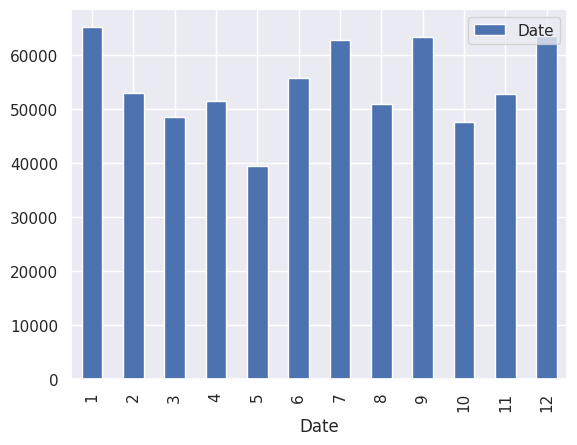

In [ ]:
df_date.groupby(df_date["Date"].dt.month).count().plot(kind="bar")

Berdasarkan data transaksi yang dilakukan per bulannya, kita bisa lihat bahwa transaksi terbanyak ada pada bulan Desember, kemudian November. Hal ini dikarenakan pada bulan Desember adalah bulan liburan akhir tahun dan natal yang mana orang-orang akan mulai membeli kupon voucher promo untuk berbelanja.

In [ ]:
#data kategori
categorical = ["Status Transaksi", "Kategori", 'Kelas Voucher']
df_categorical = df[categorical]
df_categorical.head()

Status Transaksi           Kategori Kelas Voucher
0          Reguler    App & Lifestyle  Sangat Besar
1          Reguler    App & Lifestyle  Sangat Besar
2          Reguler    App & Lifestyle  Sangat Besar
3          Reguler  Gold & Investment         Besar
4          Reguler  Gold & Investment  Sangat Besar

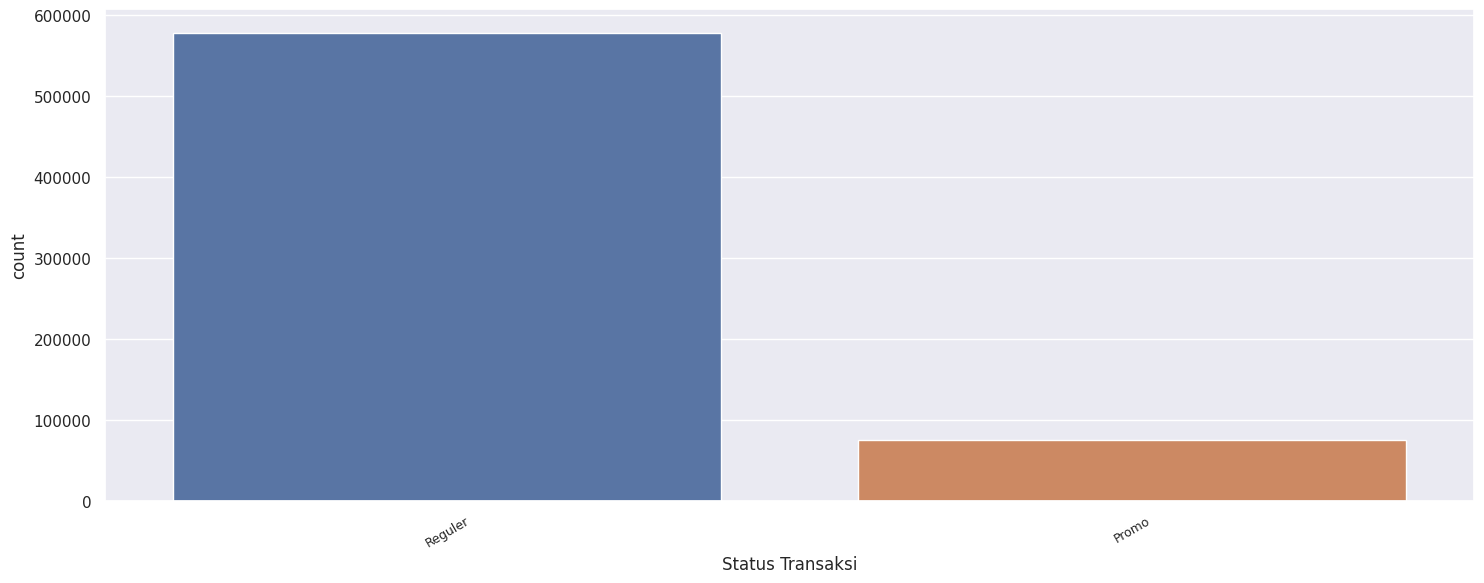

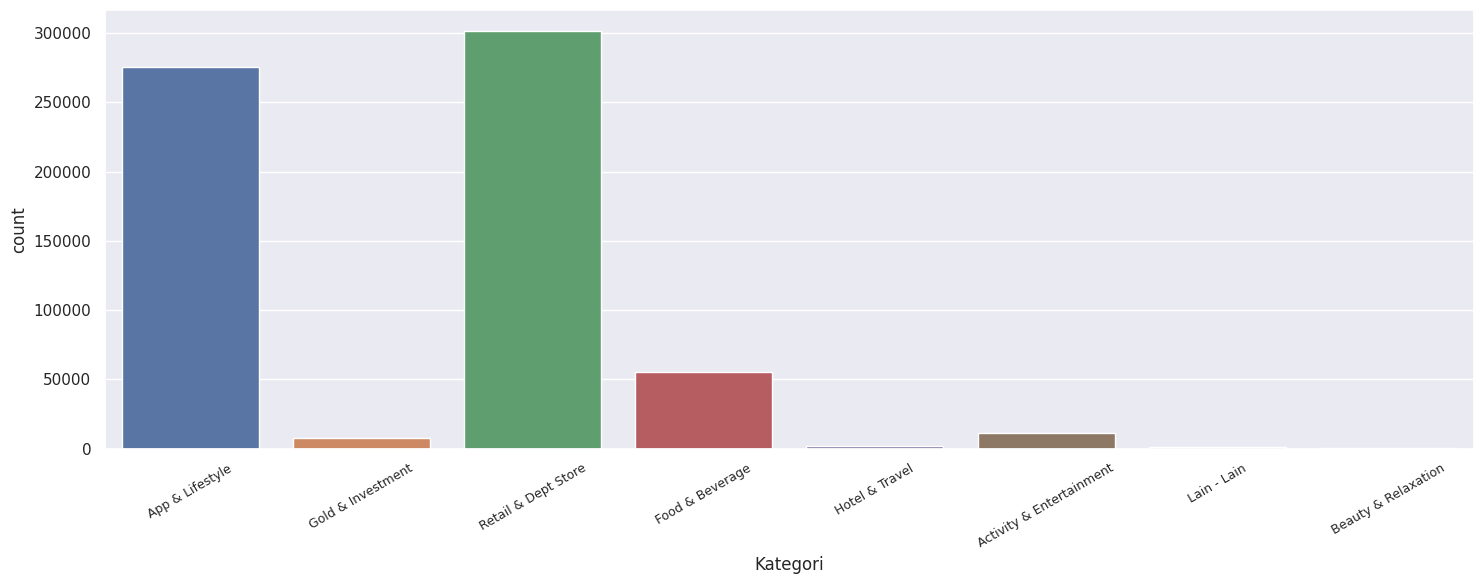

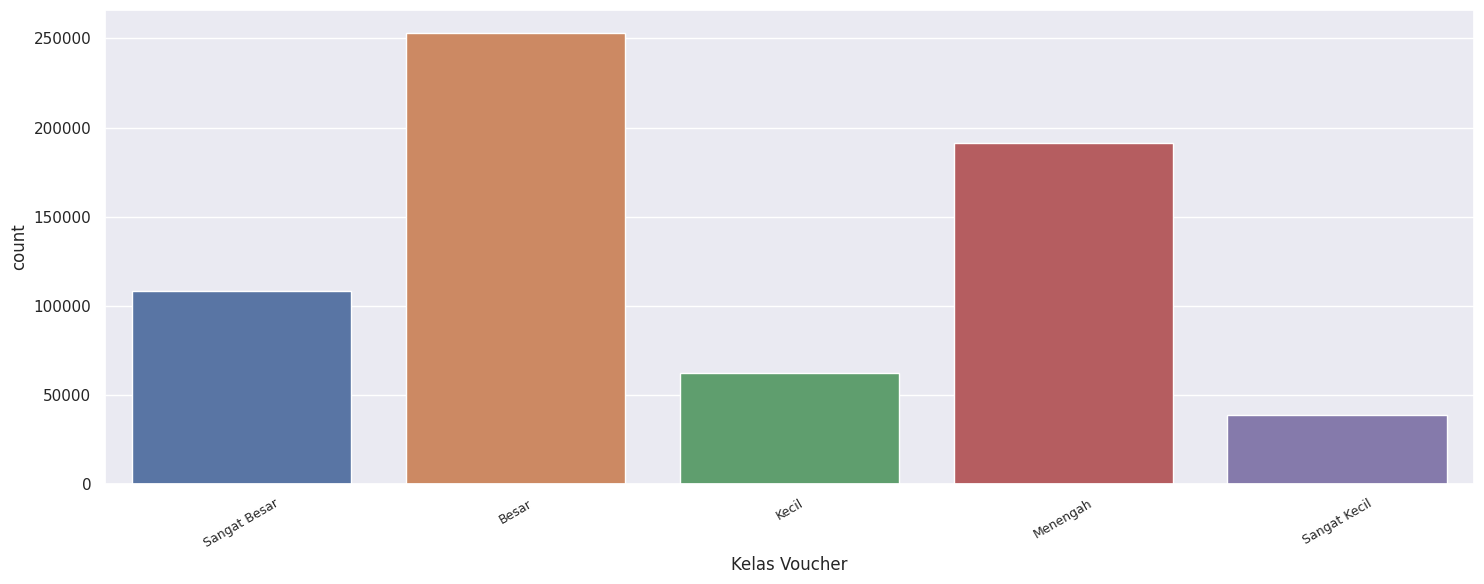

In [ ]:
# Melihat perbandingan data kategori disetiap kolom
for col in categorical:
    plt.figure(figsize=(15,6))
    plt.xticks(fontsize=9, rotation=30)
    sns.countplot(x=col, data=df)
    plt.tight_layout()


Berdasarkan data kategori di atas, kita bisa lihat persebaran pembeliannya.

Pada Status Transaksi, jauh lebih banyak customer yang membeli pada keadaan reguler dibandingkan pada saat promo. Hal ini bisa menjadi perhatian lebih dalam mengembangkan ide promo agar engage pembelian dengan status transaksi reguler tidak terlalu jauh dengan pembelian dengan status transaksi promo.

Kemudian pada kolom Kategori pembelian voucher, kategori voucher paling banyak ada pada App & Lifestyle. Hal ini bisa menjadi perhatian untuk perusahaan dalam mempertahankan status ini. Kemudain diikuti oleh pembelian voucher Retail & Dept Store dan Food & Beverage. Kedua kategori ini memiliki potensi engage pembelian yang tinggi maka dari itu perlu dikembangkan.

In [ ]:
pd.crosstab(df['Kelas Voucher'],df['Kategori'])

Kategori       Activity & Entertainment  App & Lifestyle  Beauty & Relaxation  \
Kelas Voucher                                                                   
Besar                              3390            63971                  298   
Kecil                              1007            61546                    0   
Menengah                           6468            80519                    1   
Sangat Besar                        117            31060                  433   
Sangat Kecil                          3            38280                    0   

Kategori       Food & Beverage  Gold & Investment  Hotel & Travel  \
Kelas Voucher                                                       
Besar                    26334               2318             329   
Kecil                        0                  0               0   
Menengah                 27306                717             613   
Sangat Besar              1559               4505             763   
Sangat Kecil                 0                  0               0   

Kategori       Lain - Lain  Retail & Dept Store  
Kelas Voucher                                    
Besar                  318               156346  
Kecil                    0                    0  
Menengah               750                74886  
Sangat Besar            77                69740  
Sangat Kecil             0                  696

    Teku : ini belum semua di analisis EDA, baru data kategoriknya. mungkin bisa tambahin kaya per waktu gitu

    teku : Any idea apalagi yang harus di EDA?

### DATA PRE-PROCESSING

####Encode

- Mei

In [ ]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = df[categorical].apply(label_encoder.fit_transform)

# Menggabungkan kolom dengan data kategori
cluster_data = pd.concat([encoded_data, df[["Amount", "Selling Price", "Quantity", "Total Amount", "Total Selling Price"]]], axis=1)

cluster_data.head()

Status Transaksi  Kategori  Kelas Voucher   Amount  Selling Price  \
0                 1         1              3   500000         500000   
1                 1         1              3   500000         500000   
2                 1         1              3  1000000        1000000   
3                 1         4              0   100000          99000   
4                 1         4              3  1000000         990000   

   Quantity  Total Amount  Total Selling Price  
0         1        500000               500000  
1         1        500000               500000  
2         1       1000000              1000000  
3         1        100000                99000  
4         2       2000000              1980000

#### Feature Selection

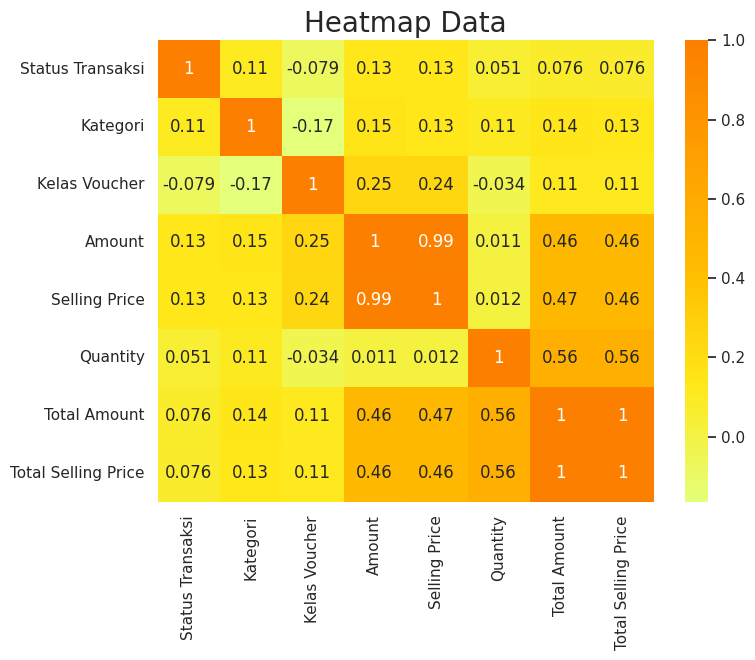

In [ ]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

Dari hasil Heatmap di atas terlihat bahwa korelasi terbesar dimiliki Total Selling Price dan Total Amount. Kemudian Selling Price dan Amount. Dan juga Total Selling Price, Total Amount dengan Quantity.

In [ ]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(["Amount", "Total Amount"], axis = 1)
cluster_data.head()

Status Transaksi  Kategori  Kelas Voucher  Selling Price  Quantity  \
0                 1         1              3         500000         1   
1                 1         1              3         500000         1   
2                 1         1              3        1000000         1   
3                 1         4              0          99000         1   
4                 1         4              3         990000         2   

   Total Selling Price  
0               500000  
1               500000  
2              1000000  
3                99000  
4              1980000

     Ini jangan di drop

####Scalling Data

In [ ]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["Status Transaksi", 'Kategori','Kelas Voucher', "Selling Price", "Quantity", "Total Selling Price"]] = scaler.fit_transform(cluster_data[["Status Transaksi", 'Kategori','Kelas Voucher', "Selling Price", "Quantity", "Total Selling Price"]])
cluster_data.head()

Status Transaksi  Kategori  Kelas Voucher  Selling Price  Quantity  \
0                 0        -1              1              1        -0   
1                 0        -1              1              1        -0   
2                 0        -1              1              2        -0   
3                 0         0             -1             -0        -0   
4                 0         0              1              2        -0   

   Total Selling Price  
0                   -0  
1                   -0  
2                    0  
3                   -0  
4                    1

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
cluster_data.head()

Status Transaksi  Kategori  Kelas Voucher  Selling Price  Quantity  \
0            0.3619   -1.0317         1.2140         0.6484   -0.1469   
1            0.3619   -1.0317         1.2140         0.6484   -0.1469   
2            0.3619   -1.0317         1.2140         1.7287   -0.1469   
3            0.3619    0.0094        -1.0834        -0.2180   -0.1469   
4            0.3619    0.0094         1.2140         1.7071   -0.0601   

   Total Selling Price  
0              -0.0382  
1              -0.0382  
2               0.1455  
3              -0.1856  
4               0.5057

    Nanti buat kolombaru kategorik berdasarkan amount aja, terus masukin nanti kategori ke cluster ini

In [ ]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654350 entries, 0 to 654349
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Status Transaksi     654350 non-null  float64
 1   Kategori             654350 non-null  float64
 2   Kelas Voucher        654350 non-null  float64
 3   Selling Price        654350 non-null  float64
 4   Quantity             654350 non-null  float64
 5   Total Selling Price  654350 non-null  float64
dtypes: float64(6)
memory usage: 30.0 MB


    nanti dicari ini koma berapa

####Handling outlier after scaling

    teku was doin this

<Axes: >

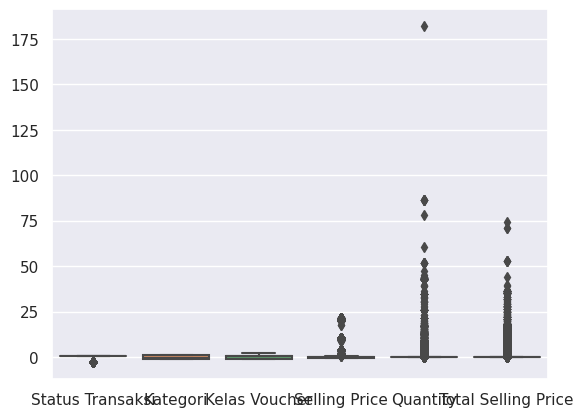

In [ ]:
sns.boxplot(cluster_data)

<Axes: >

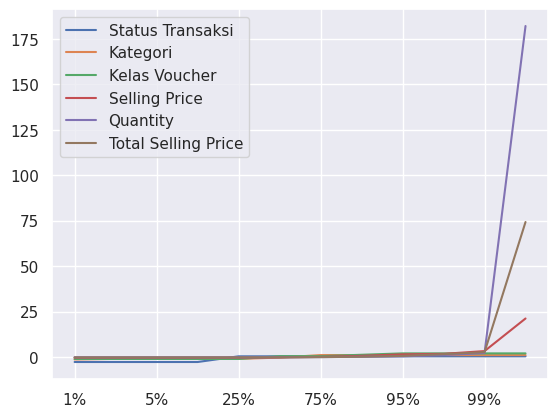

In [ ]:
# kita coba identifikasi dari persentil nya
cluster_data.describe(percentiles =[0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.98,0.99])[4:].plot()

In [ ]:
cluster_data.describe(percentiles =[0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.98,0.99] )

Status Transaksi     Kategori  Kelas Voucher  Selling Price  \
count      654,350.0000 654,350.0000   654,350.0000   654,350.0000   
mean            -0.0000       0.0000         0.0000         0.0000   
std              1.0000       1.0000         1.0000         1.0000   
min             -2.7628      -1.3788        -1.0834        -0.4313   
1%              -2.7628      -1.3788        -1.0834        -0.4211   
2%              -2.7628      -1.0317        -1.0834        -0.4211   
5%              -2.7628      -1.0317        -1.0834        -0.4211   
10%             -2.7628      -1.0317        -1.0834        -0.4103   
25%              0.3619      -1.0317        -1.0834        -0.3735   
50%              0.3619      -0.3376         0.4482        -0.2439   
75%              0.3619       1.0505         0.4482         0.0543   
90%              0.3619       1.0505         1.2140         0.6484   
95%              0.3619       1.0505         1.9797         1.4479   
98%              0.3619       1.0505         1.9797         1.7287   
99%              0.3619       1.0505         1.9797         3.2412   
max              0.3619       1.0505         1.9797        21.1742   

          Quantity  Total Selling Price  
count 654,350.0000         654,350.0000  
mean       -0.0000              -0.0000  
std         1.0000               1.0000  
min        -0.1469              -0.2220  
1%         -0.1469              -0.2201  
2%         -0.1469              -0.2201  
5%         -0.1469              -0.2201  
10%        -0.1469              -0.2183  
25%        -0.1469              -0.2109  
50%        -0.1469              -0.1878  
75%        -0.0601              -0.0801  
90%         0.1135               0.1455  
95%         0.3740               0.6049  
98%         1.0686               1.5512  
99%         2.1973               2.6721  
max       182.0973              74.2532

       Status Transaksi     Kategori  Kelas Voucher  Selling Price  \
count      639,390.0000 639,390.0000   639,390.0000   639,390.0000   
mean            -0.0082      -0.0071        -0.0146        -0.0731   
std              1.0097       1.0002         0.9965         0.5111   
min             -2.7628      -1.3788        -1.0834        -0.4313   
25%              0.3619      -1.0317        -1.0834        -0.3779   
50%              0.3619      -0.3376         0.4482        -0.2439   
75%              0.3619       1.0505         0.4482         0.0543   
max              0.3619       1.0505         1.9797         3.2412   

          Quantity  Total Selling Price  
count 639,390.0000         639,390.0000  
mean       -0.0674              -0.0888  
std         0.2110               0.2850  
min        -0.1469              -0.2220  
25%        -0.1469              -0.2113  
50%        -0.1469              -0.1889  
75%        -0.0601              -0.1117  
max         2.1105               

<Axes: >

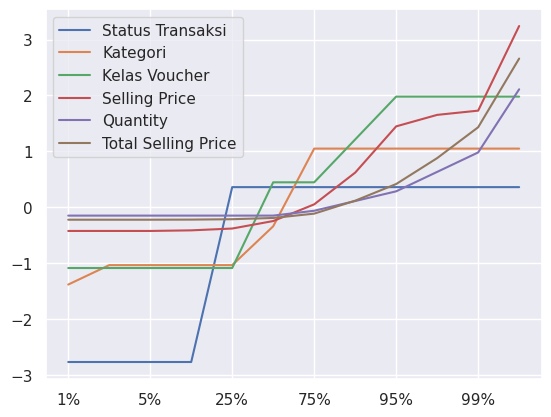

In [ ]:
dfx2 = cluster_data[(cluster_data['Quantity'] < 2.1973	 ) &
                    (cluster_data['Total Selling Price'] <2.6721) &
                    (cluster_data['Selling Price'] <3.2412) 	]

print(dfx2.describe())
dfx2.describe(percentiles =[0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.98,0.99])[4:].plot()

<Axes: >

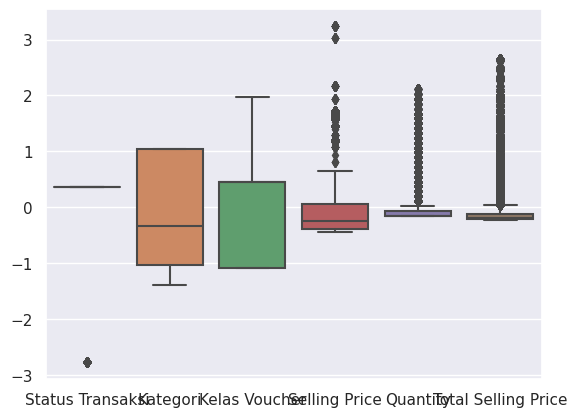

In [ ]:
sns.boxplot(dfx2)

In [ ]:
cluster_data = dfx2
cluster_data

Status Transaksi  Kategori  Kelas Voucher  Selling Price  Quantity  \
0                 0.3619   -1.0317         1.2140         0.6484   -0.1469   
1                 0.3619   -1.0317         1.2140         0.6484   -0.1469   
2                 0.3619   -1.0317         1.2140         1.7287   -0.1469   
3                 0.3619    0.0094        -1.0834        -0.2180   -0.1469   
4                 0.3619    0.0094         1.2140         1.7071   -0.0601   
...                  ...       ...            ...            ...       ...   
654345           -2.7628   -0.3376         0.4482        -0.3670   -0.1469   
654346           -2.7628   -0.3376         0.4482        -0.3606   -0.1469   
654347            0.3619   -1.0317         1.9797        -0.4211   -0.1469   
654348            0.3619   -1.3788        -1.0834        -0.0646   -0.1469   
654349            0.3619   -1.0317        -1.0834        -0.2158   -0.0601   

        Total Selling Price  
0                   -0.0382  
1                   -0.0382  
2                    0.1455  
3                   -0.1856  
4                    0.5057  
...                     ...  
654345              -0.2109  
654346              -0.2098  
654347              -0.2201  
654348              -0.1595  
654349              -0.1485  

[639390 rows x 6 columns]

    teku : Gimana udah agak lumayan kah?

### MODELING

- Fariz
- Indah

#### Menentukan Nilai Optimal K (kelompok)

In [ ]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


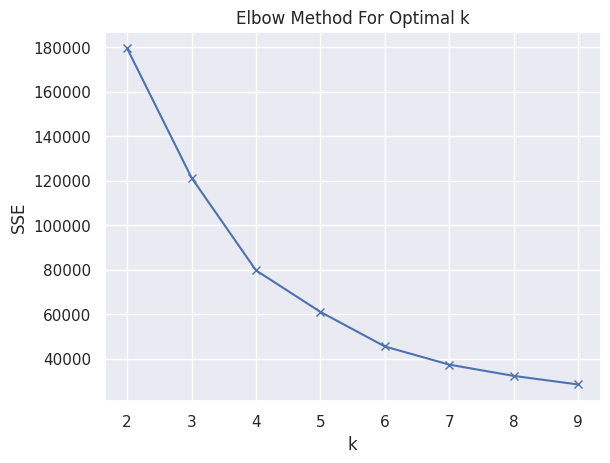

In [ ]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

### EVALUATION

In [ ]:
range_n_clusters = range(2,5)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2, silhouette score is 0.76676276858043


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KeyboardInterrupt: ignored

Dari silhouette score di dapat nilai k yang optimum adalah k = 2

In [ ]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=3)
cluster.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([df, segment], axis=1)
results.head()

index        Nomor Transaksi Status Transaksi             Order At  \
0      0 1,640,970,000,000.0000          Reguler  2022-01-01 00:02:30   
1      1 1,640,970,000,000.0000          Reguler  2022-01-01 00:07:05   
2      2 1,640,970,000,000.0000          Reguler  2022-01-01 00:09:00   
3      3 1,640,970,000,000.0000          Reguler  2022-01-01 00:11:50   
4      4 1,640,970,000,000.0000          Reguler  2022-01-01 00:11:50   

        Date  Merchant ID           Kategori  \
0 2022-01-01        T675a    App & Lifestyle   
1 2022-01-01        T675a    App & Lifestyle   
2 2022-01-01        T675a    App & Lifestyle   
3 2022-01-01  T672672672a  Gold & Investment   
4 2022-01-01  T672672672a  Gold & Investment   

                            SKU Product Name Nomor Customer Register Date  \
0          Voucher Digital T675a Rp. 500.000       rpbvpbvu    2021-10-16   
1          Voucher Digital T675a Rp. 500.000       rpbvpbvu    2021-10-16   
2        Voucher Digital T675a Rp. 1.000.000       ipbvpbve    2021-08-02   
3    Voucher Digital T672672672a Rp. 100.000       rpbvpbvn    2020-09-11   
4  Voucher Digital T672672672a Rp. 1.000.000       rpbvpbvn    2020-09-11   

    Amount  Selling Price  Quantity  Total Amount  Total Selling Price  \
0   500000         500000         1        500000               500000   
1   500000         500000         1        500000               500000   
2  1000000        1000000         1       1000000              1000000   
3   100000          99000         1        100000                99000   
4  1000000         990000         2       2000000              1980000   

  Kelas Voucher  segment  
0  Sangat Besar   2.0000  
1  Sangat Besar   2.0000  
2  Sangat Besar   2.0000  
3         Besar   1.0000  
4  Sangat Besar   1.0000

In [ ]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

index        Nomor Transaksi Status Transaksi             Order At  \
4349   4349 1,641,190,000,000.0000          Reguler  2022-01-03 12:07:52   
4350   4350 1,641,190,000,000.0000          Reguler  2022-01-03 12:07:52   
4351   4351 1,641,190,000,000.0000          Reguler  2022-01-03 12:08:19   
4352   4352 1,641,190,000,000.0000          Reguler  2022-01-03 12:08:57   
4353   4353 1,641,190,000,000.0000          Reguler  2022-01-03 12:09:17   

           Date        Merchant ID         Kategori  \
4349 2022-01-03  U675675675675675r  App & Lifestyle   
4350 2022-01-03  U675675675675675r  App & Lifestyle   
4351 2022-01-03              T675a  App & Lifestyle   
4352 2022-01-03              T675a  App & Lifestyle   
4353 2022-01-03  U675675675675675r  App & Lifestyle   

                                   SKU Product Name Nomor Customer  \
4349  Voucher Digital U675675675675675r Rp. 100.000       apbvpbvn   
4350   Voucher Digital U675675675675675r Rp. 50.000       apbvpbvn   
4351              Voucher Digital T675a Rp. 500.000       dpbvpbvr   
4352              Voucher Digital T675a Rp. 250.000       jpbvpbva   
4353  Voucher Digital U675675675675675r Rp. 100.000       lpbvpbv.   

     Register Date  Amount  Selling Price  Quantity  Total Amount  \
4349    2021-12-26  100000         100000         1        100000   
4350    2021-12-26   50000          50000         1         50000   
4351    2021-11-02  500000         500000         2       1000000   
4352    2018-07-24  250000         250000         2        500000   
4353    2021-06-23  100000         100000         1        100000   

      Total Selling Price Kelas Voucher  segment  
4349               100000         Besar   0.0000  
4350                50000      Menengah   0.0000  
4351              1000000  Sangat Besar   0.0000  
4352               500000         Besar   0.0000  
4353               100000         Besar   0.0000

In [ ]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

index        Nomor Transaksi Status Transaksi             Order At  \
3       3 1,640,970,000,000.0000          Reguler  2022-01-01 00:11:50   
4       4 1,640,970,000,000.0000          Reguler  2022-01-01 00:11:50   
22     22 1,640,970,000,000.0000          Reguler  2022-01-01 01:01:54   
38     38 1,640,980,000,000.0000          Reguler  2022-01-01 02:37:59   
39     39 1,640,980,000,000.0000          Reguler  2022-01-01 03:43:16   

         Date        Merchant ID           Kategori  \
3  2022-01-01        T672672672a  Gold & Investment   
4  2022-01-01        T672672672a  Gold & Investment   
22 2022-01-01  U675675675675675r    App & Lifestyle   
38 2022-01-01              T675a    App & Lifestyle   
39 2022-01-01     L672672672672s  Gold & Investment   

                                SKU Product Name Nomor Customer Register Date  \
3        Voucher Digital T672672672a Rp. 100.000       rpbvpbvn    2020-09-11   
4      Voucher Digital T672672672a Rp. 1.000.000       rpbvpbvn    2020-09-11   
22  Voucher Digital U675675675675675r Rp. 25.000       mpbvpbvm    2021-12-10   
38             Voucher Digital T675a Rp. 500.000       apbvpbvr    2020-08-17   
39  Voucher Digital L672672672672s Rp. 5.000.000       ipbvpbvd    2021-04-10   

     Amount  Selling Price  Quantity  Total Amount  Total Selling Price  \
3    100000          99000         1        100000                99000   
4   1000000         990000         2       2000000              1980000   
22    25000          25000         1         25000                25000   
38   500000         500000         1        500000               500000   
39  5000000        5000000         1       5000000              5000000   

   Kelas Voucher  segment  
3          Besar   1.0000  
4   Sangat Besar   1.0000  
22      Menengah   1.0000  
38  Sangat Besar   1.0000  
39  Sangat Besar   1.0000

In [ ]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==2][:5]

index        Nomor Transaksi Status Transaksi             Order At  \
0      0 1,640,970,000,000.0000          Reguler  2022-01-01 00:02:30   
1      1 1,640,970,000,000.0000          Reguler  2022-01-01 00:07:05   
2      2 1,640,970,000,000.0000          Reguler  2022-01-01 00:09:00   
5      5 1,640,970,000,000.0000          Reguler  2022-01-01 00:17:24   
6      6 1,640,970,000,000.0000          Reguler  2022-01-01 00:24:52   

        Date Merchant ID         Kategori  \
0 2022-01-01       T675a  App & Lifestyle   
1 2022-01-01       T675a  App & Lifestyle   
2 2022-01-01       T675a  App & Lifestyle   
5 2022-01-01       T675a  App & Lifestyle   
6 2022-01-01       T675a  App & Lifestyle   

                      SKU Product Name Nomor Customer Register Date   Amount  \
0    Voucher Digital T675a Rp. 500.000       rpbvpbvu    2021-10-16   500000   
1    Voucher Digital T675a Rp. 500.000       rpbvpbvu    2021-10-16   500000   
2  Voucher Digital T675a Rp. 1.000.000       ipbvpbve    2021-08-02  1000000   
5  Voucher Digital T675a Rp. 1.000.000       cpbvpbvi    2020-08-28  1000000   
6    Voucher Digital T675a Rp. 500.000       ipbvpbve    2021-08-02   500000   

   Selling Price  Quantity  Total Amount  Total Selling Price Kelas Voucher  \
0         500000         1        500000               500000  Sangat Besar   
1         500000         1        500000               500000  Sangat Besar   
2        1000000         1       1000000              1000000  Sangat Besar   
5        1000000         1       1000000              1000000  Sangat Besar   
6         500000         1        500000               500000  Sangat Besar   

   segment  
0   2.0000  
1   2.0000  
2   2.0000  
5   2.0000  
6   2.0000

### EDA

<Axes: xlabel='segment', ylabel='Total Selling Price'>

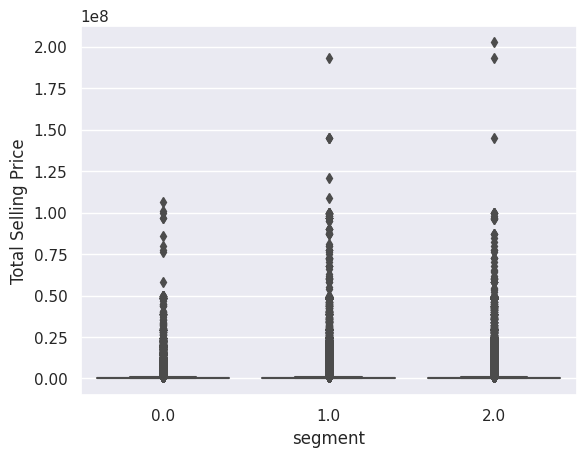

In [ ]:
# Pengelompokan customer berdasarkan
sns.boxplot(x=results["segment"], y=results["Total Selling Price"], data=results)

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Total Selling Price")
plt.title("Jumlah Cluster Berdasarkan Profesi")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

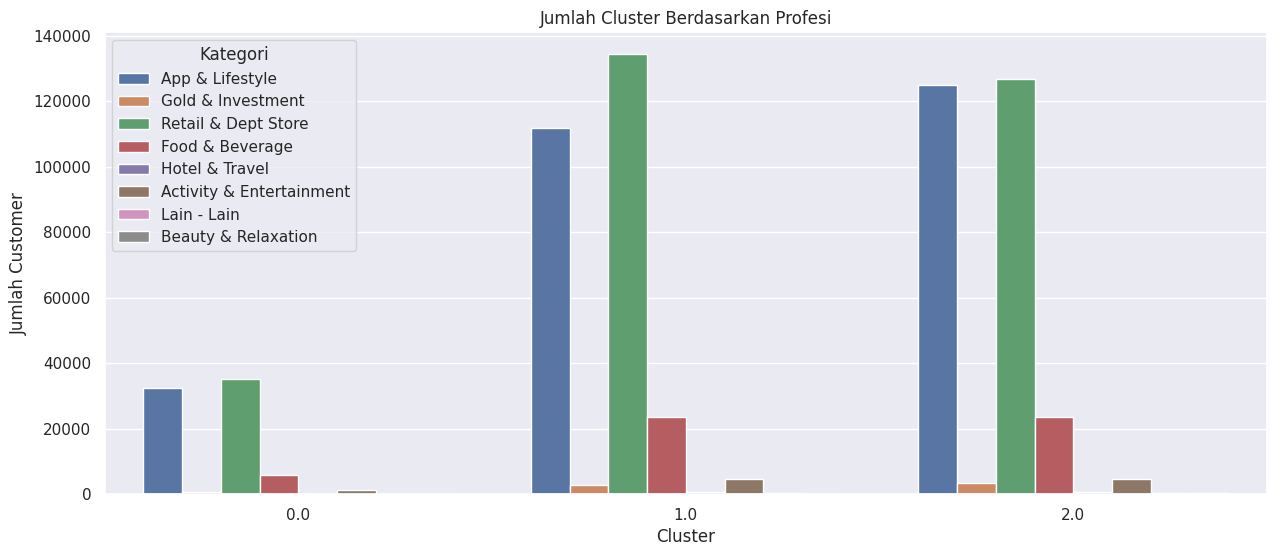

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Kategori")
plt.title("Jumlah Cluster Berdasarkan Profesi")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

    teku : guys apaka kita harus coba rfm?

    kategori yang mirip di merge aja

---



<Axes: xlabel='segment', ylabel='Total Selling Price'>

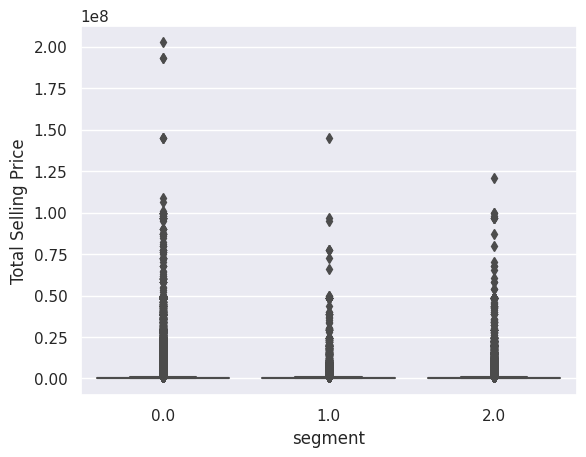

In [ ]:
sns.boxplot(x=results["segment"], y=results["Total Selling Price"], data=results)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'App & Lifestyle'),
  Text(1, 0, 'Food & Beverage'),
  Text(2, 0, 'Retail & Dept Store'),
  Text(3, 0, 'Gold & Investment'),
  Text(4, 0, 'Activity & Entertainment'),
  Text(5, 0, 'Hotel & Travel'),
  Text(6, 0, 'Lain - Lain'),
  Text(7, 0, 'Beauty & Relaxation')])

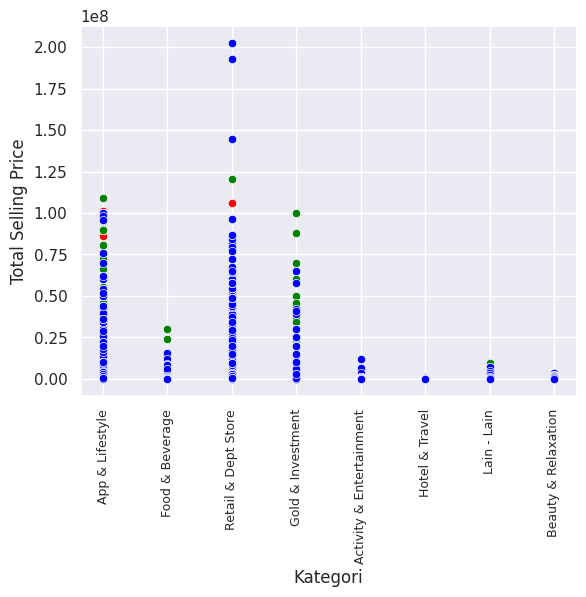

In [ ]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["segment"]==0].Kategori, y=results[results["segment"]==0]['Total Selling Price'], color="red")
sns.scatterplot(x=results[results["segment"]==1].Kategori, y=results[results["segment"]==1]['Total Selling Price'], color="green")
sns.scatterplot(x=results[results["segment"]==2].Kategori, y=results[results["segment"]==2]['Total Selling Price'], color="blue")
sns.scatterplot(x=results[results["segment"]==3].Kategori, y=results[results["segment"]==3]['Total Selling Price'], color="yellow")

plt.xticks(fontsize=9, rotation=90)

### KESIMPULAN/SARAN